LOAD THE DATA AND PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('collegeinsight_data_nolabel_ICs_by_year.csv', encoding="ISO-8859-1") # default encoding couldn't ready all characters

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


EDA AND DATA CLEANING

In [2]:
df.head()

,data_yr_string,entity_id,entity_type,name,city,state,state_fips,cong_dist,webaddr,sector,...,compl_rpy_7yr_n,noncom_rpy_7yr_n,dep_rpy_7yr_n,ind_rpy_7yr_n,pell_rpy_7yr_n,nopell_rpy_7yr_n,female_rpy_7yr_n,male_rpy_7yr_n,firstgen_rpy_7yr_n,notfirstgen_rpy_7yr_n
0,2000-01,111100654,1,ALABAMA A & M UNIVERSITY,NORMAL,AL,1.0,NaN,WWW.AAMU.EDU,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01,111100663,1,UNIVERSITY OF ALABAMA AT BIRMINGHAM,BIRMINGHAM,AL,1.0,NaN,www.uab.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01,111100706,1,UNIVERSITY OF ALABAMA IN HUNTSVILLE,HUNTSVILLE,AL,1.0,NaN,www.uah.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01,111100724,1,ALABAMA STATE UNIVERSITY,MONTGOMERY,AL,1.0,NaN,www.alasu.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01,111100751,1,UNIVERSITY OF ALABAMA,TUSCALOOSA,AL,1.0,NaN,www.ua.edu,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139149 entries, 0 to 139148
Columns: 408 entries, data_yr_string to notfirstgen_rpy_7yr_n
dtypes: float64(396), int64(3), object(9)
memory usage: 433.1+ MB


In [4]:
# all columns
my_list = list(df)

print (my_list)

['data_yr_string', 'entity_id', 'entity_type', 'name', 'city', 'state', 'state_fips', 'cong_dist', 'webaddr', 'sector', 'control', 'level', 'title_iv', 'hbcu', 'unitid', 'opeid6', 'opeid8', 'reporting_type', 'deggrant', 'ugoffer', 'carnegie2000', 'carnegie2010', 'carnegie2015', 'carnegie2018', 'fa_loans_debt_p', 'fa_loans_debt_avg_d', 'fa_loans_debt_pc_d', 'fa_loans_fed_p', 'fa_loans_fed_avg_d', 'fa_loans_fed_pc_d', 'fa_loans_nfed_pc_d', 'fa_loans_fed_vol_p', 'fa_loans_nfed_vol_p', 'fa_loans_debt_cohort_n', 'fa_loans_debt_n', 'fa_ftft_loans_any_n', 'fa_ftft_loans_any_p', 'fa_ftft_loans_any_avg_d', 'fa_ug_nd_n', 'fa_ug_nd_p', 'fa_ug_nd_met_p', 'fa_ug_award_n', 'fa_ug_nd_full_n', 'fa_ug_nd_full_p', 'fa_ftft_aid_n', 'fa_ftft_aid_p', 'fa_grants_tot_d', 'fa_grants_fed_tot_d', 'fa_grants_fed_nb_d', 'fa_grants_fed_nnb_d', 'fa_grants_state_tot_d', 'fa_grants_state_nb_d', 'fa_grants_state_nnb_d', 'fa_grants_inst_tot_d', 'fa_grants_inst_nb_d', 'fa_grants_inst_nnb_d', 'fa_grants_inst_nb_p', 'fa_g

In [5]:
print(df['data_yr_string'])

0         2000-01
1         2000-01
2         2000-01
3         2000-01
4         2000-01
           ...   
139144    2018-19
139145    2018-19
139146    2018-19
139147    2018-19
139148    2018-19
Name: data_yr_string, Length: 139149, dtype: object


In [6]:
df[['data_yr_string1','data_yr_string2']] = df['data_yr_string'].str.split("-",expand=True,)
print(df['data_yr_string2'])
# I use df['data_yr_string2'] cus it is a School year coded as for example 2018-19, 
# so I am using the last year

0         01
1         01
2         01
3         01
4         01
          ..
139144    19
139145    19
139146    19
139147    19
139148    19
Name: data_yr_string2, Length: 139149, dtype: object


In [7]:
# entity type 6 is state total and entity type 10 is nation total
x = df[df['entity_type'] == 6]
y = df[df['entity_type'] == 6]
new_df = x + y
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 145 to 139132
Columns: 410 entries, data_yr_string to data_yr_string2
dtypes: float64(396), int64(3), object(11)
memory usage: 2.7+ MB


Text(0.5, 1.0, 'Average debt of graduates')

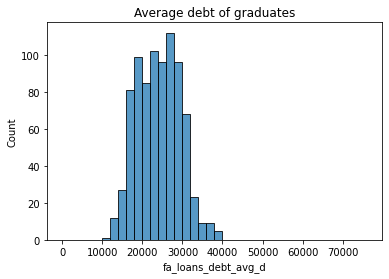

In [8]:
sns.histplot(data=x, x='fa_loans_debt_avg_d', binrange=(0,75000), binwidth=2000).set_title('Average debt of graduates')

In [9]:
x['fa_loans_debt_p'] = x['fa_loans_debt_p'] * 100

<ipython-input-9-891b78c0a8cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['fa_loans_debt_p'] = x['fa_loans_debt_p'] * 100


Text(0.5, 1.0, 'Average debt of graduates')

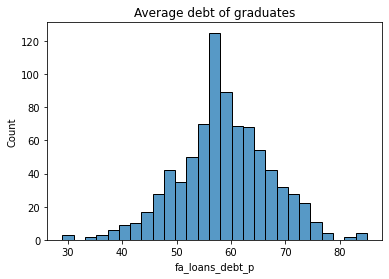

In [10]:
#Percent of graduates from 4-year public and private nonprofit colleges who are carrying student debt
sns.histplot(data=x, x='fa_loans_debt_p').set_title('Average debt of graduates')

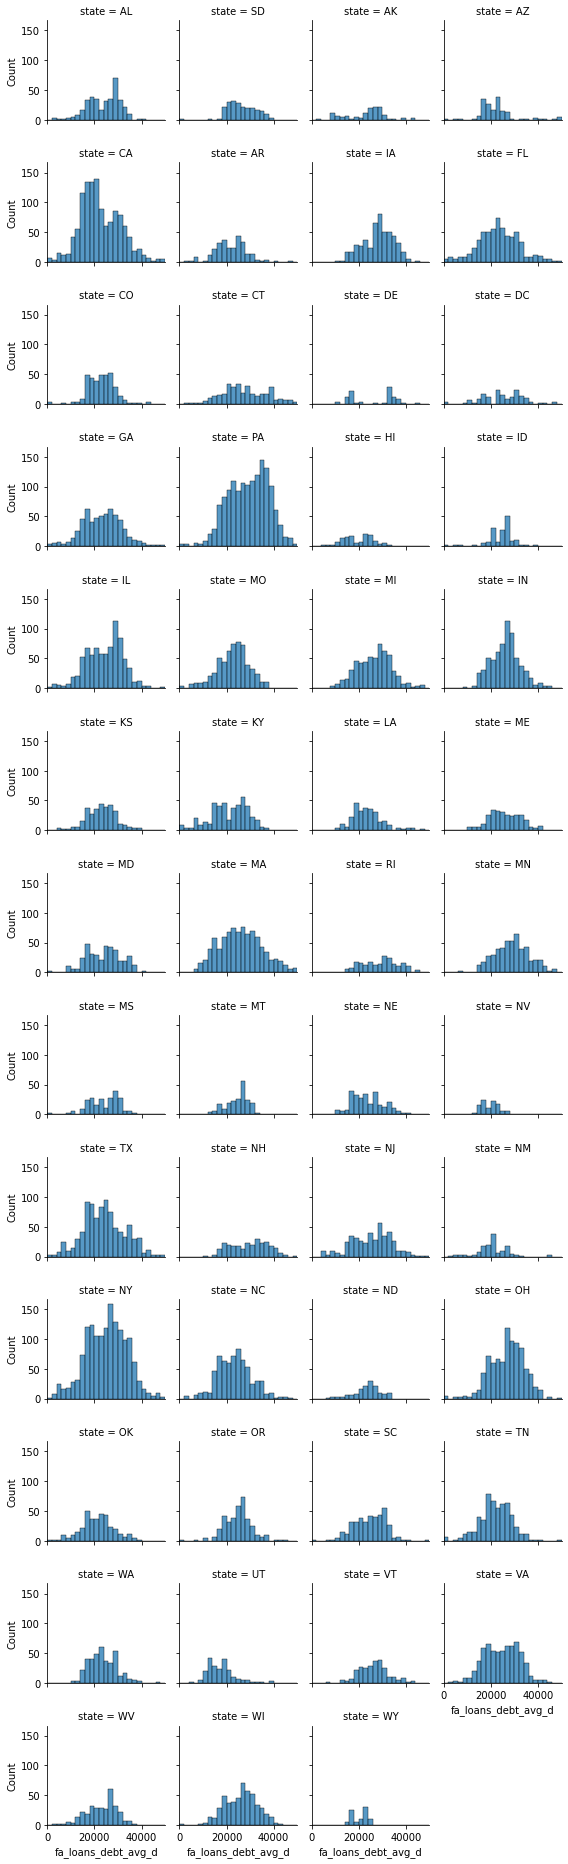

In [18]:
## Average debt of graduates by state
g = sns.FacetGrid(df, col="state", col_wrap=4, height=2, xlim=(0,50000))
g.map(sns.histplot, "fa_loans_debt_avg_d",binrange=(0,50000), binwidth=2000)

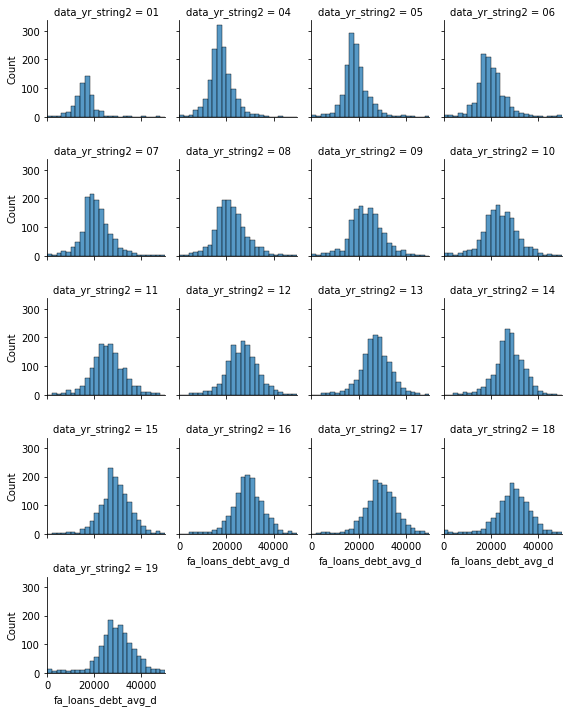

In [19]:
## Average debt of graduates by state
g = sns.FacetGrid(df, col="data_yr_string2", col_wrap=4, height=2, xlim=(0,50000))
g.map(sns.histplot, "fa_loans_debt_avg_d",binrange=(0,50000), binwidth=2000)